## Задание 1

Получить асимптотический ряд для интеграла $\displaystyle F(\lambda) = \int_2^5 \ln(5 + x) e^{-2\lambda x} dx = \int_2^5 y(x, \lambda) dx$ при $\lambda \to \infty$.

Данный интеграл является интегралом Лапласа с конечными границами, где $S(x) = -2x$, $f(x) = \ln(x+ 5)$.

Так как основной вклад в такие интегралы вносят окрестности максимумов, найдём их и для нашего случая.

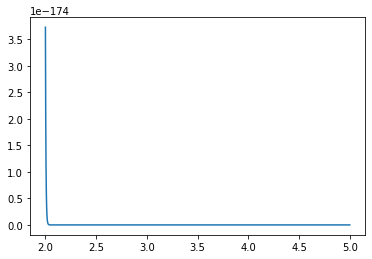

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def y(x, l):
    return np.log(5 + x) * np.exp(-2*l*x)

xs = np.linspace(2, 5, 1000)
ys = [y(x, 100) for x in xs]

plt.plot(xs, ys)

In [2]:
from scipy.optimize import minimize

minimize(lambda x: -y(x, 5), [3.0], bounds=((2.0, 5.0),), method="Powell")

   direc: array([[1.67921892e-09]])
     fun: array(-4.01081975e-09)
 message: 'Optimization terminated successfully.'
    nfev: 216
     nit: 3
  status: 0
 success: True
       x: array([2.])

Получили численное решение максимума $x_0 = 2$. Что, впрочем, было достаточно очевидно аналитически, но проверить стоило.

Заметим, что $x_0 = 2$ — левая граница области интегрирования и $S''(x_0) = -2 < 0$.  Поэтому мы можем применить следующее разложение:

$\displaystyle F(\lambda) = \sum_{k = 0}^{+\infty} \frac{(-1)^{k+1}}{\lambda^{k + 1}} e^{\lambda S(x)} (\frac{1}{S'(x)}\frac{d}{dx})^k \frac{f(x)}{S'(x)}\Big|_{x=a} + O(\frac{e^{\lambda S(a)}}{\lambda^n})$

Подставим конктеные значения:
* $S'(x) = -2$

$\displaystyle F(\lambda) = \sum_{k = 0}^{+\infty} \frac{(-1)^{k+1}}{\lambda^{k + 1}} e^{-2\lambda x} (-\frac{1}{2}\frac{d}{dx})^k \frac{\ln(x + 5)}{-2}\Big|_{x=a} + O(\frac{e^{-4\lambda}}{\lambda^n})$

* Вынесем $(-\frac{1}{2})^k$ из дифференциального оператора
* Заметим, что ряд производных $\ln(x + 5)$ выглядит следующим образом: $\ln(x + 5),\ \frac{1}{(x + 5)}, \frac{-1}{(x + 5)^2},\ \frac{2}{(x + 5)^3},\ \frac{-6}{(x + 5)^4}, \dots, \frac{(-1)^k k!}{(x + 5)^{k + 1}}$

Таким образом, после упрощения получим:

$\displaystyle F(\lambda) = \frac{1}{2\lambda}e^{-2\lambda x}\ln(x + 5)\Big|_{x = 2} + \sum_{k = 1}^{+\infty} \frac{(-1)^k}{(2\lambda(x + 5))^{k + 1}} k! e^{-2\lambda x} \Big|_{x = 2} + O(\frac{e^{-4\lambda}}{\lambda^n})$

$\displaystyle F(\lambda) = \frac{1}{2\lambda}e^{-4\lambda}\ln(7) + \sum_{k = 1}^{+\infty} \frac{(-1)^k}{(14\lambda)^{k + 1}} k! e^{-4\lambda} + O(\frac{e^{-4\lambda}}{\lambda^n})$


## Задание 2

Получить асимптотический ряд для интеграла $\displaystyle F(\lambda) = \int_{\frac{\pi}{3}}^{\frac{2\pi}{3}} \frac{1}{x^2} e^{\lambda (\sin^2(x) - \cos^2(x))} dx = \int_{\frac{\pi}{3}}^{\frac{2\pi}{3}} y(x, \lambda) dx$ при $\lambda \to \infty$.

* $f(x) = \frac{1}{x^2}$
* $S(x) = \sin^2 x - \cos^2 x$

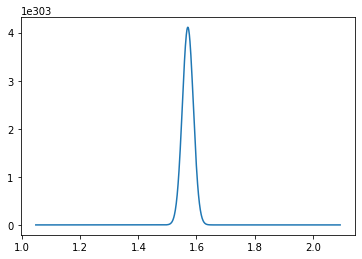

In [50]:
def y(x, l):
    return 1 / (x**2) * np.exp(l * (np.sin(x)**2 - np.cos(x)**2))

xs = np.linspace(np.pi / 3, 2 * np.pi / 3, 1000)
ys = [y(x, 700) for x in xs]

plt.plot(xs, ys)

In [51]:
from scipy.optimize import minimize
from tqdm.notebook import tqdm

n_iter = 10000
with tqdm(total = n_iter) as pbar:
    def update_pbar(_):
        pbar.update(1)
    min_res = minimize(lambda x: -y(x, 700), [np.pi / 2], bounds=((np.pi / 3, 2 * np.pi / 3),), method="Powell", options={'maxiter': n_iter}, callback=update_pbar)

print(min_res)


   direc: array([[-1.26157702e-05]])
     fun: array(-4.11171816e+303)
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 2
  status: 0
 success: True
       x: array([1.57034146])


c:\python\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\python\lib\site-packages\scipy\optimize\optimize.py:2967: RuntimeWarning: overflow encountered in double_scalars
  t -= delta*temp*temp
c:\python\lib\site-packages\scipy\optimize\optimize.py:1956: RuntimeWarning: overflow encountered in multiply
  if ((np.abs(p) < np.abs(0.5*q*r)) and (p > q*(a - xf)) and
c:\python\lib\site-packages\scipy\optimize\optimize.py:1957: RuntimeWarning: overflow encountered in multiply
  (p < q * (b - xf))):
c:\python\lib\site-packages\scipy\optimize\optimize.py:1947: RuntimeWarning: overflow encountered in multiply
  p = (xf - fulc) * q - (xf - nfc) * r
c:\python\lib\site-package

In [39]:
np.pi / 2

1.5707963267948966

Численный эксперимент говорит, что максимум $y(x, \lambda)$ близок к $\displaystyle \frac{\pi}{2}$.
И действительно, сделаем замену $\sin^2 x - \cos^2 x = -\cos{2x}$, получив $\displaystyle F(\lambda) = \int_{\frac{\pi}{3}}^{\frac{2\pi}{3}} \frac{1}{x^2} e^{-\lambda \cos{2x}} dx$

Максимальное значение $F(\lambda)$ достигает при минимальном значении $\cos{2x}$, а именно при $-1$ $\Rightarrow$ $\displaystyle x_0 = \frac{\pi}{2}$.

Попробуем воспользоваться основной теоремой:

* [x] $f$ и $S$ - гладкие функции на отрезке интегрирования
* [x] Максимум $S(x)$ достигается в кдинственной точке на отрезке интегрирования
* [x] $\displaystyle f(x_0) = \frac{4}{\pi^2} \ne 0$
* [x] $S''(x_0) = 4\cos{\pi} = -4 < 0$

Все условия основной теоремы выполенеы. Тогда

$\displaystyle F(\lambda) = \int_a^b f(x) e^{\lambda S(x)} dx \approx \sqrt{\frac{2\pi}{-\lambda S''(x_0)}} f(x_0) e^{\lambda S(x_0)}(1 + O(\frac{1}{\lambda}))$


$\displaystyle F(\lambda) = \int_{\frac{\pi}{3}}^{\frac{2\pi}{3}} \frac{1}{x^2} e^{-\lambda \cos{2x}} dx \approx \frac{4}{pi^2} \sqrt{\frac{\pi}{2\lambda}} e^{\lambda} (1 + O(\frac{1}{\lambda}))$

Предварительные вычисления, сходные с примером из **Лекция 5. Слайды 7-8**, показывают схожий асимптотический ряд, так что приводить данные вычисления в этой работе показаны не будут.


## Задание 3

Получить асимптотический ряд для интеграла $\displaystyle F(\lambda) = \int_{-\infty}^{+\infty} \sqrt{x^2 + 1} e^{i\lambda(x^2 - 2x) - x^2} dx = \int_{-\infty}^{+\infty} y(x, \lambda) dx$ при $\lambda \to \infty$.

* $\displaystyle f(x) = \sqrt{x^2 + 1} e^{-x^2}$
* $S(x) = x^2 - 2x$

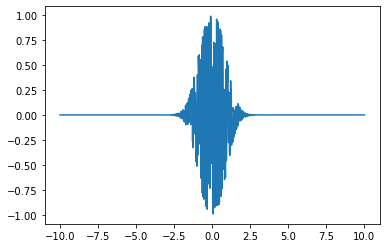

In [80]:
def y(x, l):
    return np.sqrt(x**2 + 1) * np.exp(1j * l * (x**2 - 2*x) - x**2)

xs = np.linspace(-10, 10, 1000)
ysr = np.real([y(x, 1000) for x in xs])
ysi = np.imag([y(x, 1000) for x in xs])

plt.plot(xs, ysr)

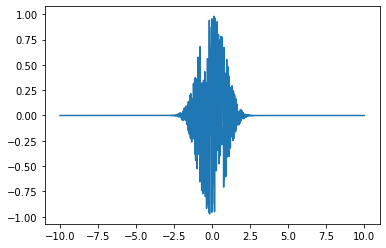

In [81]:
plt.plot(xs, ysi)

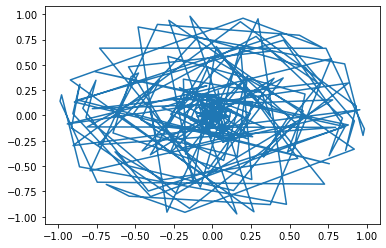

In [82]:
plt.plot(ysr, ysi)

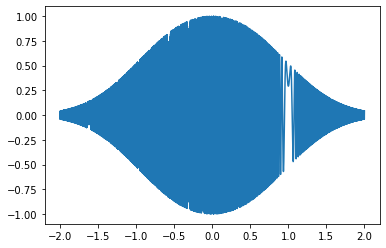

In [101]:
xs = np.linspace(-2, 2, 10000)
ysr = np.real([y(x, 1000) for x in xs])
ysi = np.imag([y(x, 1000) for x in xs])

plt.plot(xs, ysr)

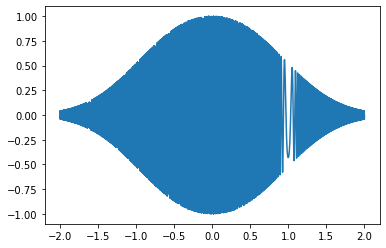

In [102]:
plt.plot(xs, ysi)

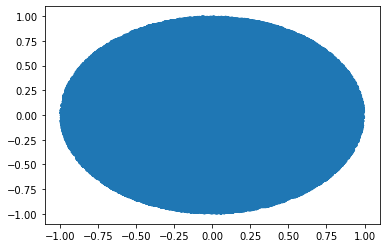

In [103]:
plt.plot(ysr, ysi)

Исходя их полученных графиков, видно, что нас инересует стационарная точка где-то в районе $1$.
Действительно, $S'(x) = 2(x - 1)$, $S'(x_0 = 1) = 0$. Таким образом, $x_0 = 1$ является единственной стационарной точкой.

Исходя из этого попробуем воспольховаться Теоремой о вкладе стационарной точки (**Ильин Eq 15.5**,  **Лекция 6 Слайд 10**):
* [x] $f \in C_0^{\infty}[\mathbb{R}]$
* [x] $S \in C^{\infty}[\mathbb{R}$
* [x] $S'(x_0) = 0$
* [x] $S''(x) = 2 > 0$

Тогда $\displaystyle \int_{-\infty}^{+\infty} f(x) e^{i\lambda S(x)} dx \approx \sqrt{\frac{2\pi}{\lambda |S''(x_0)|}} e^{i\lambda S(x_0) + i\frac{\pi}{4}} (f(x_0) + O(\frac{1}{\lambda}))$

$\displaystyle F(\lambda) = \sqrt{\frac{\pi}{\lambda}} \exp(i(\frac{\pi}{4} - \lambda) (\frac{\sqrt 2}{e} + O(\frac{1}{\lambda}))$